<a href="https://colab.research.google.com/github/BucketofJava/stanford-cs229-autumn-2018/blob/main/CS229Sols.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Set 1

Problem 1

In [ ]:
#1b
import numpy as np
import util
import math

from linear_model import LinearModel


def main(train_path, eval_path, pred_path):
    """Problem 1(b): Logistic regression with Newton's Method.
    Args:
        train_path: Path to CSV file containing dataset for training.
        eval_path: Path to CSV file containing dataset for evaluation.
        pred_path: Path to save predictions.
    """
    x_train, y_train = util.load_dataset(train_path, add_intercept=True)
    print(list(x_train))
    x_eval, y_eval=util.load_dataset(eval_path, add_intercept=True)
    # *** START CODE HERE ***
    logisticRegression=LogisticRegression(theta_0=np.zeros(x_train.shape[1]))
    logisticRegression.fit(x_train, y_train)
    predictions=logisticRegression.predict(x_eval);
    absolutedif=np.abs(predictions-y_eval)
    print(np.sum(absolutedif)/absolutedif.shape[0])
    # *** END CODE HERE ***

def sigmoid(z):
  sigmoidReturn= (1/(1+(math.e**(-z))));
  if(sigmoidReturn==0):
    print(z)
  return sigmoidReturn;

class LogisticRegression(LinearModel):
    """Logistic regression with Newton's Method as the solver.
    Example usage:
        > clf = LogisticRegression()
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def fit(self, x, y):
        """Run Newton's Method to minimize J(theta) for logistic regression.
        Args:
            x: Training example inputs. Shape (m, n).
            y: Training example labels. Shape (m,).
        """
        # *** START CODE HERE ***
        
        for i in range(self.max_iter):
          theta_change=self.newtonUpdate(x, y);
          if(math.sqrt(np.dot(theta_change, theta_change))<self.eps):
            break;
          self.theta-=theta_change;

        # *** END CODE HERE ***
    # def newtonUpdate(self, x, y):
    #   Jprimesum=0;
    #   Jsum=0
    #   for i in range(x.shape[0]):
    #     g_val=sigmoid(np.dot(x[i], self.theta))
    #     Jprimesum+=x[i]*(y[i]-g_val);
    #     Jsum+=(y[i]*math.log(g_val))-((1-y[i])*math.log(1-g_val))
    #   return Jprimesum/Jsum;
    def newtonUpdate(self, x, y):
      m=x.shape[0]
      n=x.shape[1]
      hessian=np.zeros((n, n))
      derivvec=np.zeros(n)
      for j in range(n):
        derivvecsum=0;
        for k in range(n):
          hesjksum=0
          for i in range(m):
            g_val=sigmoid(np.dot(self.theta, x[i]))
            if(k==0):
              derivvecsum+=x[i][j]*(g_val-y[i])
            hesjksum+=x[i][j]*x[i][k]*(g_val)*(1-g_val)
          hessian[j][k]=(1/m)*hesjksum
        derivvec[j]=(1/m)*derivvecsum;
     # print(hessian)
      try:
        hessianinverse=np.linalg.inv(hessian);
        return np.matmul(hessianinverse, derivvec)
      except:
        print("Singular matrix")
        return np.zeros(n);


    
    
    def predict(self, x):
        """Make a prediction given new inputs x.
        Args:
            x: Inputs of shape (m, n).
        Returns:
            Outputs of shape (m,).
        """
        # *** START CODE HERE ***
        return 1 / (1 + np.exp(-x.dot(self.theta)))
        # *** END CODE HERE ***
main("/content/ds1_train.csv", "/content/ds1_valid.csv", "/content/ds1_train.csv")

[array([ 1.        ,  2.91180854, 60.35961272]), array([  1.        ,   3.77474554, 344.1492843 ]), array([  1.        ,   2.61548828, 178.22208681]), array([ 1.        ,  2.01369376, 15.25947155]), array([ 1.        ,  2.75762504, 66.19417399]), array([ 1.        ,  0.97392246, 41.67766519]), array([  1.        ,   3.06727469, 143.27558992]), array([ 1.        ,  2.76309408, 35.96990594]), array([ 1.        ,  2.7757715 , 29.56907921]), array([ 1.        ,  2.10982995, 76.63672138]), array([  1.        ,   3.00626278, 107.38296323]), array([  1.        ,   4.41577468, 148.95788196]), array([ 1.        ,  2.31433469, 79.24692536]), array([ 1.        ,  2.88848049, 63.01109005]), array([ 1.        ,  1.53977359, 19.77567822]), array([ 1.        ,  1.79853993, 84.14172897]), array([ 1.        ,  2.70208908, 55.74518237]), array([  1.        ,   3.55545784, 142.49950489]), array([ 1.        ,  2.55371183, 48.2333977 ]), array([ 1.        ,  2.47014052, 24.36272067]), array([  1.        , 

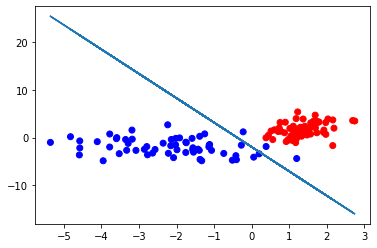

0.052696460170517524


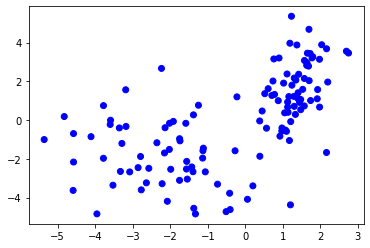

0.15682972477270124


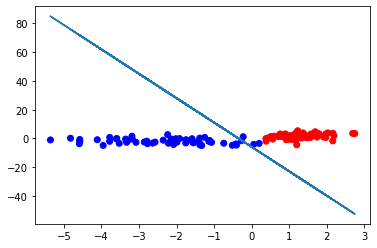

0.4427227184895077


In [ ]:
import numpy as np
import util
import matplotlib.pyplot as plt



# Character to replace with sub-problem letter in plot_path/pred_path
WILDCARD = 'X'


def main(train_path, valid_path, test_path, pred_path):
    """Problem 2: Logistic regression for incomplete, positive-only labels.
    Run under the following conditions:
        1. on y-labels,
        2. on l-labels,
        3. on l-labels with correction factor alpha.
    Args:
        train_path: Path to CSV file containing training set.
        valid_path: Path to CSV file containing validation set.
        test_path: Path to CSV file containing test set.
        pred_path: Path to save predictions.
    """
    pred_path_c = pred_path.replace(WILDCARD, 'c')
    pred_path_d = pred_path.replace(WILDCARD, 'd')
    pred_path_e = pred_path.replace(WILDCARD, 'e')

    # *** START CODE HERE ***
    # Part (c): Train and test on true labels
    x_train_ds3, t_train_ds3=util.load_dataset(train_path, label_col="t", add_intercept=True);
    x_eval_ds3, t_eval_ds3=util.load_dataset(test_path, label_col="t", add_intercept=True)
    logisticRegressionds3=LogisticRegression(theta_0=np.zeros(x_train_ds3.shape[1]))
    logisticRegressionds3.fit(x_train_ds3, t_train_ds3)
    t_pred_ds3=logisticRegressionds3.predict(x_eval_ds3);
    c_arr=[]
    index_arr=[]
    for i in t_pred_ds3:
      if(i>=0.5):
        c_arr.append("r")
      else:
        c_arr.append("b")
    
    plt.scatter(x_eval_ds3[:, 1], x_eval_ds3[:, 2], c=c_arr)
    plt.plot(x_eval_ds3[:, 1], 2*((logisticRegressionds3.theta[0]*np.ones(x_eval_ds3.shape[0]))-(x_eval_ds3[:, 1]*logisticRegressionds3.theta[1]/logisticRegressionds3.theta[2])))
    plt.show()
    intercept_vals=np.ones(x_eval_ds3.shape[0])
    x1_vals=np.array(range(x_eval_ds3.shape[0]))
    x2_vals=np.array(range(x_eval_ds3.shape[0]))
    # hyperplane_t_values=(logisticRegressionds3.theta[0]*intercept_vals)+(logisticRegressionds3.theta[1]*x1_vals)+(logisticRegressionds3.theta[2]*x2_vals)
    # plt.plot(x1_vals, x2_vals, hyperplane_t_values)
    # plt.show()
    absolutedif_ds3=np.abs(t_pred_ds3-t_eval_ds3)
    print(np.sum(absolutedif_ds3)/absolutedif_ds3.shape[0])   
    
    # Make sure to save outputs to pred_path_c
    # Part (d): Train on y-labels and test on true labels
    x_train_ds3, y_train_ds3=util.load_dataset(train_path, label_col="y", add_intercept=True);
    x_eval_ds3, y_eval_ds3=util.load_dataset(test_path, label_col="y", add_intercept=True)
    logisticRegressionds3=LogisticRegression(theta_0=np.zeros(x_train_ds3.shape[1]))
    logisticRegressionds3.fit(x_train_ds3, y_train_ds3)
    y_pred_ds3=logisticRegressionds3.predict(x_eval_ds3);
    c_arr=[]
    for i in y_pred_ds3:
      if(i>=0.5):
        c_arr.append("r")
      else:
        c_arr.append("b")
    plt.scatter(x_eval_ds3[:, 1], x_eval_ds3[:, 2], c=c_arr)
    plt.show()
    absolutedif_ds3=np.abs(y_pred_ds3-y_eval_ds3)
    print(np.sum(absolutedif_ds3)/absolutedif_ds3.shape[0])
    # Make sure to save outputs to pred_path_d
    # Part (e): Apply correction factor using validation set and test on true labels
    x_val_ds3, y_val_ds3=util.load_dataset(train_path, label_col="y", add_intercept=True);
    alpha=(1/x_val_ds3.shape[0])*np.sum(logisticRegressionds3.predict(x_val_ds3));
    y_pred_ds3=y_pred_ds3/alpha
    # x_eval_ds3, y_eval_ds3=util.load_dataset(test_path, label_col="t", add_intercept=True)
    # logisticRegressionds3=LogisticRegression(theta_0=np.zeros(x_train_ds3.shape[1]))
    # logisticRegressionds3.fit(x_train_ds3, y_train_ds3)
    # y_pred_ds3=logisticRegressionds3.predict(x_eval_ds3);
    # absolutedif_ds3=np.abs(y_pred_ds3-y_eval_ds3)
    c_arr=[]
    for i in y_pred_ds3:
      if(i>=0.5):
        c_arr.append("r")
      else:
        c_arr.append("b")
    plt.scatter(x_eval_ds3[:, 1], x_eval_ds3[:, 2], c=c_arr)
    plt.plot(x_eval_ds3[:, 1], 2*((logisticRegressionds3.theta[0]*np.ones(x_eval_ds3.shape[0]))-(x_eval_ds3[:, 1]*logisticRegressionds3.theta[1]/logisticRegressionds3.theta[2])))
    plt.show()
    absolutedif_ds3=np.abs(y_pred_ds3-t_eval_ds3)
    print(np.sum(absolutedif_ds3)/absolutedif_ds3.shape[0])
    # Plot and use np.savetxt to save outputs to pred_path_e
    # *** END CODER HERE
main("/content/ds3_train.csv", "/content/ds3_valid.csv", "/content/ds3_test.csv", "/content/ds3_test.csv")